In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

## 1 Understand the data

In [3]:
data.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [5]:
data.shape

(1000, 8)

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [38]:
ProfileReport(data)

### clean data

In [8]:
#check for null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### relationship analysis

## Univariate Categorical Analysis

In [70]:
def univariate_pie(data):
    plt.figure(figsize=[15,5])
    return plt.pie(data.value_counts().values, labels=data.value_counts().index, startangle=90, autopct='%1.f%%');

In [48]:
data.gender.value_counts().index

Index(['female', 'male'], dtype='object')

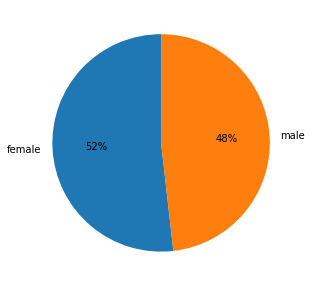

In [71]:
# Gender
univariate_pie(data['gender']);

- There are more females than males

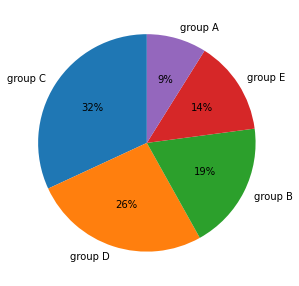

In [72]:
# race
univariate_pie(data['race/ethnicity']);

The following had the most race:
- Group C 
- Group D
- Group B
- Group E
- Group A

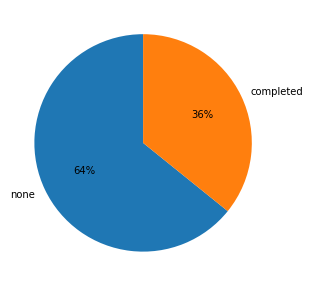

In [73]:
# test preparation score
univariate_pie(data['test preparation course']);

- 64% did not complete the test preparatoion course

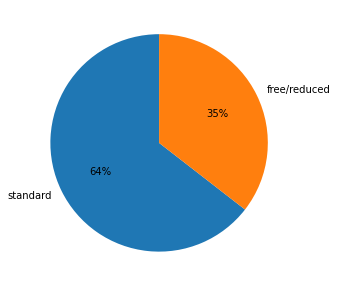

In [74]:
# lunch
univariate_pie(data['lunch']);

- 64% had standard lunch whilst 35% had free lunch

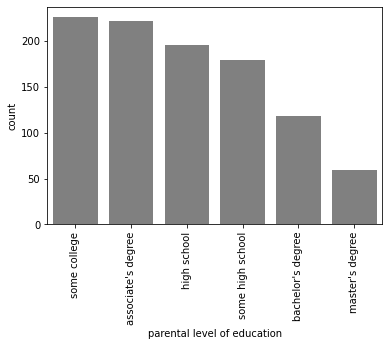

In [93]:
sns.countplot(data=data, x='parental level of education', color='grey', order = data['parental level of education'].value_counts().index)
plt.xticks(rotation = 90);

The following are the top most level of education
- some college
- associates degree
- high school
- some high school
- bachelor's 
- masters degree

## Univariate Numeric

In [97]:
# math score
def dist_box_violin(data):
    
    Name = data.name
    fig, axes = plt.subplots(1,3,figsize=[17,7])
    fig.suptitle('Spread of Data for ' + Name, fontsize=14, fontweight='bold')
    sns.distplot(data, ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(data, ax=axes[1])
    sns.violinplot(data, ax=axes[2])

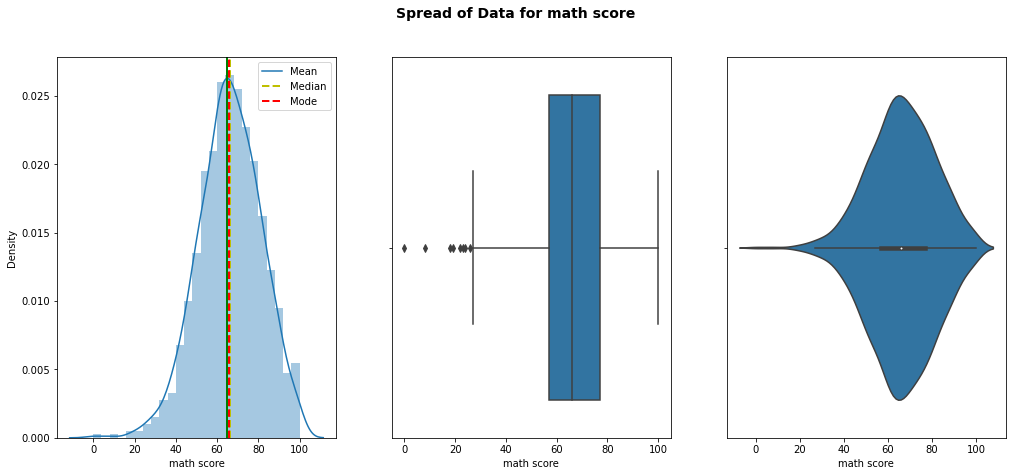

In [98]:
dist_box_violin(data['math score'])

- left skewed
- there are outlier below 30
- scores ranges averagely between 60 and 80
- Mode score: 36
- Mean:66.089
- Median: 66

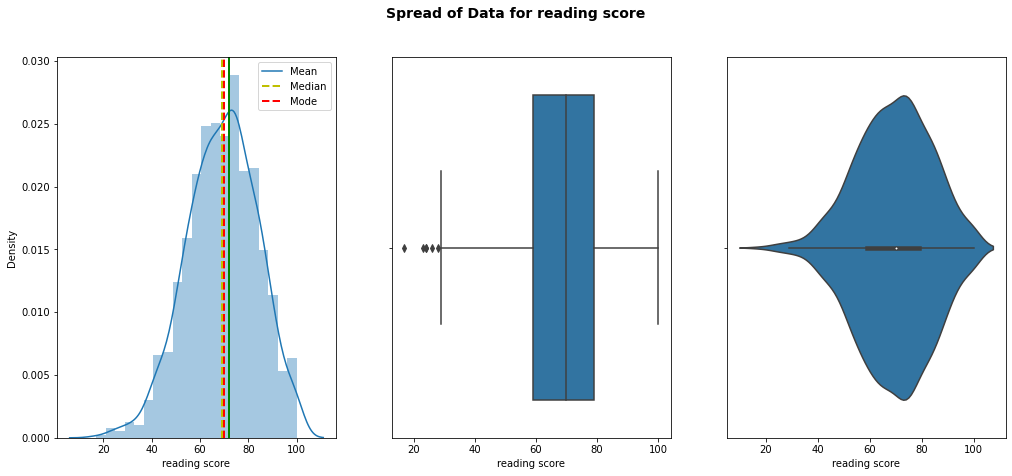

In [108]:
dist_box_violin(data['reading score'])

- left skewed
- there are outlier below 30
- scores ranges averagely between 60 and 80
- Mode score: 72
- Mean:69.17
- Median: 70

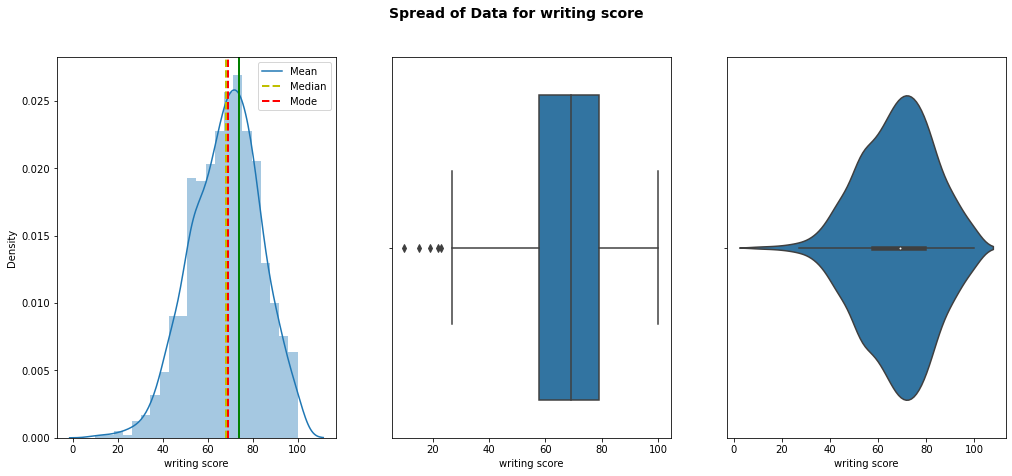

In [113]:
dist_box_violin(data['writing score'])

- left skewed
- there are outlier below 25
- scores ranges averagely between 60 and 80
- Mode score: 74
- Mean:68.05
- Median: 69

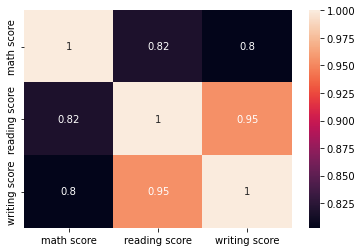

In [14]:
sns.heatmap(data.corr(),annot=True);

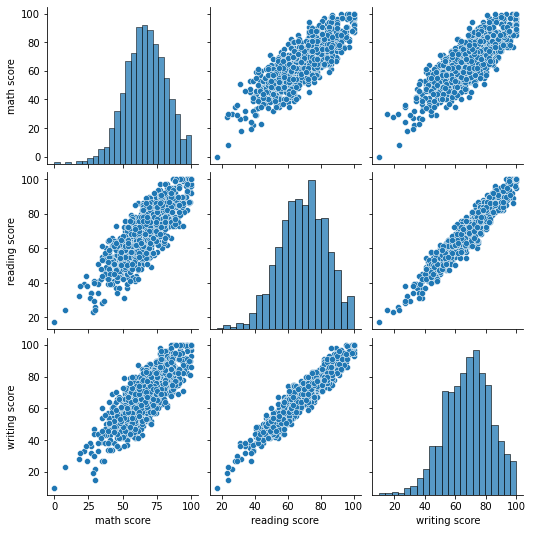

In [16]:
sns.pairplot(data);

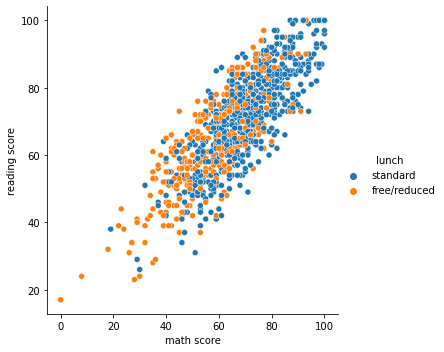

In [20]:
sns.relplot(x='math score', y='reading score', data=data, hue='lunch');

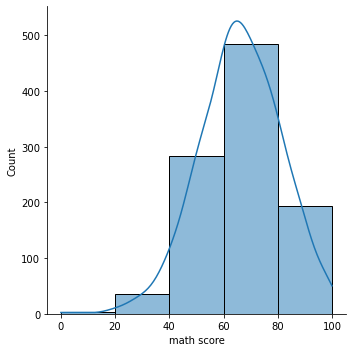

In [28]:
sns.displot(data['math score'],kde=True, bins=5);

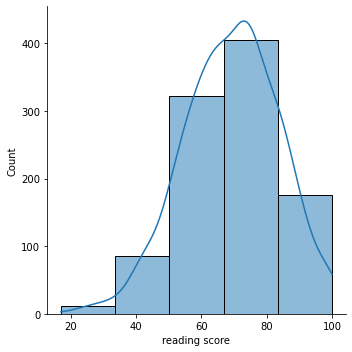

In [29]:
sns.displot(data['reading score'],kde=True, bins=5);

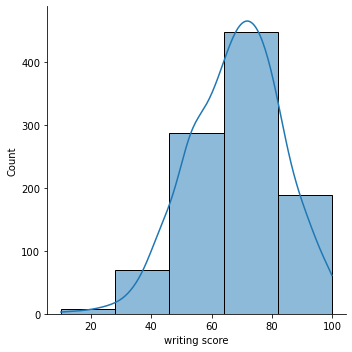

In [30]:
sns.displot(data['writing score'],kde=True, bins=5);

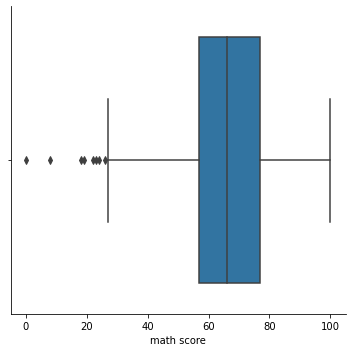

In [33]:
sns.catplot(x='math score',kind='box',data=data);